In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/mahinbindra/Downloads/sales_data.csv')

In [3]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [5]:
df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [6]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [7]:
# Drop all rows where all values are missing
df.dropna(axis='index',how='all')

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [8]:
# Drop all rows where Product column value is missing
df.dropna(axis='index', subset=['Product'], inplace=True)

In [9]:
df

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
...,...,...,...,...,...
1044,Product_48,Region_10,23.57,6.0,2024-02-28
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     900 non-null    object 
 1   Region      810 non-null    object 
 2   Price       811 non-null    float64
 3   Units Sold  809 non-null    float64
 4   Sale Date   900 non-null    object 
dtypes: float64(2), object(3)
memory usage: 42.2+ KB


In [12]:
import seaborn as sns

In [13]:
# Create a column Sales 
df['Sales'] = df['Price'] * df['Units Sold']

In [14]:
# Group by Product and Region to look at the sum of prices, units sold and Sales
df_group = df.groupby(['Product', 'Region']).sum()

In [15]:
df_group

Price  Units Sold   
Product   Region                          
Product_1 Region_1   318.42        42.0  \
          Region_10   88.44         8.0   
          Region_2   131.69        30.0   
          Region_3   268.73        18.0   
          Region_4   197.04        33.0   
...                     ...         ...   
Product_9 Region_5    55.48        25.0   
          Region_6    15.78         0.0   
          Region_7   190.14        11.0   
          Region_8   119.33         9.0   
          Region_9     2.49         9.0   

                                                    Sale Date    Sales  
Product   Region                                                        
Product_1 Region_1   2022-09-232023-07-182023-09-022024-08-22  3071.10  
          Region_10                                2023-04-13   707.52  
          Region_2             2022-01-162022-03-302024-07-20  1363.13  
          Region_3                       2022-11-092023-12-13  2149.84  
          Region_4   2022-01-122022-01-142022-05-212024-09-21  1572.73  
...                                                       ...      ...  
Product_9 Region_5                       2022-12-142024-05-04   885.51  
          Region_6                                 2022-08-27     0.00  
          Region_7                                 2022-10-11  2091.54  
          Region_8                                 2022-06-14  1073.97  
          Region_9                                 2024-01-30    22.41  

[410 rows x 4 columns]

<Axes: xlabel='Product', ylabel='Price'>

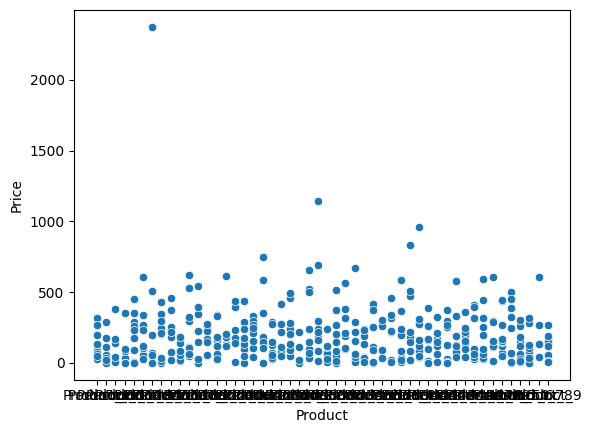

In [16]:
# Create a scatterplot to determine outliers
sns.scatterplot(data=df_group,x='Product',y='Price')

In [17]:
# Drop all records where price is greater than 1000
df.drop(df[df['Price']>1000].index, axis=0, inplace=True)

In [18]:
df[df['Price']>1000]

,Product,Region,Price,Units Sold,Sale Date,Sales


In [19]:
#Group by and sum again
df_group = df.groupby(['Product', 'Region']).sum()

In [20]:
df_group

Price  Units Sold   
Product   Region                          
Product_1 Region_1   318.42        42.0  \
          Region_10   88.44         8.0   
          Region_2   131.69        30.0   
          Region_3   268.73        18.0   
          Region_4   197.04        33.0   
...                     ...         ...   
Product_9 Region_5    55.48        25.0   
          Region_6    15.78         0.0   
          Region_7   190.14        11.0   
          Region_8   119.33         9.0   
          Region_9     2.49         9.0   

                                                    Sale Date    Sales  
Product   Region                                                        
Product_1 Region_1   2022-09-232023-07-182023-09-022024-08-22  3071.10  
          Region_10                                2023-04-13   707.52  
          Region_2             2022-01-162022-03-302024-07-20  1363.13  
          Region_3                       2022-11-092023-12-13  2149.84  
          Region_4   2022-01-122022-01-142022-05-212024-09-21  1572.73  
...                                                       ...      ...  
Product_9 Region_5                       2022-12-142024-05-04   885.51  
          Region_6                                 2022-08-27     0.00  
          Region_7                                 2022-10-11  2091.54  
          Region_8                                 2022-06-14  1073.97  
          Region_9                                 2024-01-30    22.41  

[410 rows x 4 columns]

In [21]:
# Drop all rows where Region column value is missing
df.dropna(axis='index', subset=['Region'], inplace=True)

<Axes: xlabel='Product', ylabel='Price'>

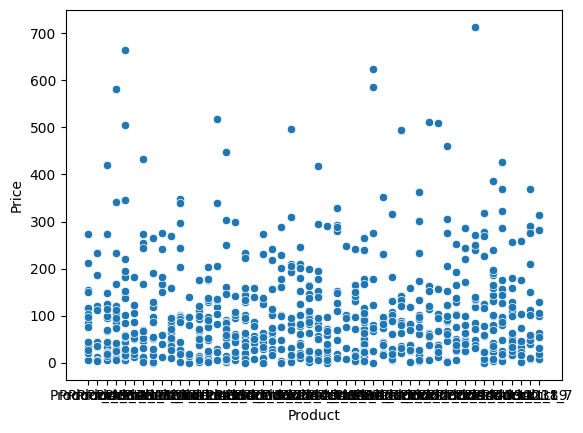

In [22]:
#Scatterplot to identify any outliers
sns.scatterplot(data=df, x="Product", y="Price")

In [107]:
df.to_csv('/Users/rupaliwadhawan/Downloads/Sales_Checkpoint.csv', index=False)

In [142]:
df = pd.read_csv('/Users/rupaliwadhawan/Downloads/Sales_Checkpoint.csv')

In [23]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
5,Product_45,Region_1,8.63,11.0,2022-01-06,94.93
6,Product_31,Region_3,23.73,6.0,2022-01-07,142.38
...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,NaN,2024-09-15,NaN
993,Product_7,Region_9,128.51,17.0,2024-09-20,2184.67
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


In [24]:
df['Month'] = df['Sale Date'].str[5:7]

<Axes: xlabel='Month', ylabel='Sales'>

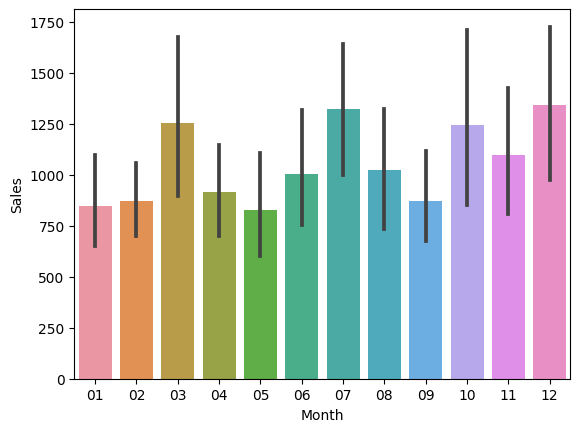

In [25]:
sns.barplot(data=df, x='Month', y='Sales')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 2 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     809 non-null    object 
 1   Region      809 non-null    object 
 2   Price       724 non-null    float64
 3   Units Sold  730 non-null    float64
 4   Sale Date   809 non-null    object 
 5   Sales       650 non-null    float64
 6   Month       809 non-null    object 
dtypes: float64(3), object(4)
memory usage: 50.6+ KB


In [27]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date,Sales,Month
count,809,809,724.000000,730.000000,809,650.000000,809
unique,50,10,NaN,NaN,809,NaN,12
top,Product_5,Region_9,NaN,NaN,2022-01-03,NaN,01
freq,28,96,NaN,NaN,1,NaN,79
mean,NaN,NaN,104.129682,10.110959,NaN,1031.877815,NaN
std,NaN,NaN,104.806524,3.225841,NaN,1107.100630,NaN
min,NaN,NaN,0.200000,2.000000,NaN,0.990000,NaN
25%,NaN,NaN,28.917500,8.000000,NaN,258.022500,NaN
50%,NaN,NaN,75.980000,10.000000,NaN,683.495000,NaN
75%,NaN,NaN,139.552500,12.000000,NaN,1395.635000,NaN


In [28]:
df.groupby(['Product'])['Price'].mean()

Product
Product_1      76.383125
Product_10     61.070833
Product_11     73.550000
Product_12     93.483333
Product_13     88.530000
Product_14    131.922857
Product_15     95.522500
Product_16    104.196471
Product_17     96.859412
Product_18     63.447500
Product_19    126.922941
Product_2     135.143333
Product_20    143.653333
Product_21     95.285714
Product_22    114.403333
Product_23    113.052667
Product_24    118.157500
Product_25    110.250000
Product_26    192.085455
Product_27     78.409286
Product_28     95.639167
Product_29    125.308824
Product_3      52.188571
Product_30    120.916316
Product_31    145.119524
Product_32     63.106000
Product_33     86.831053
Product_34    133.865000
Product_35    116.040769
Product_36     83.146364
Product_37     91.135625
Product_38     73.716364
Product_39    113.652143
Product_4      85.001111
Product_40    145.816471
Product_41    164.946429
Product_42     83.197692
Product_43     64.982778
Product_44     96.577857
Product_45    119

In [29]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales,Month
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16,01
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70,01
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14,01
5,Product_45,Region_1,8.63,11.0,2022-01-06,94.93,01
6,Product_31,Region_3,23.73,6.0,2022-01-07,142.38,01
...,...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,NaN,2024-09-15,NaN,09
993,Product_7,Region_9,128.51,17.0,2024-09-20,2184.67,09
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68,09
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60,09


In [30]:
#Replace NaN in Price column with mean of each product type
df['Price'] = df['Price'].fillna(df.groupby('Product')['Price'].transform('mean'))

In [31]:
##Replace NaN in Units Sold column with mean of each product type
df['Units Sold'] = df['Units Sold'].fillna(df.groupby('Product')['Units Sold'].transform('mean'))

In [32]:
#Create a column Sales
df['Sales'] = df['Price'] * df['Units Sold']

In [33]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales,Month
2,Product_46,Region_3,20.43,12.000000,2022-01-03,245.160000,01
3,Product_36,Region_1,12.77,10.000000,2022-01-04,127.700000,01
4,Product_17,Region_6,125.69,6.000000,2022-01-05,754.140000,01
5,Product_45,Region_1,8.63,11.000000,2022-01-06,94.930000,01
6,Product_31,Region_3,23.73,6.000000,2022-01-07,142.380000,01
...,...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,9.615385,2024-09-15,2317.019231,09
993,Product_7,Region_9,128.51,17.000000,2024-09-20,2184.670000,09
994,Product_1,Region_4,95.24,7.000000,2024-09-21,666.680000,09
998,Product_2,Region_10,43.44,15.000000,2024-09-25,651.600000,09


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 2 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     809 non-null    object 
 1   Region      809 non-null    object 
 2   Price       809 non-null    float64
 3   Units Sold  809 non-null    float64
 4   Sale Date   809 non-null    object 
 5   Sales       809 non-null    float64
 6   Month       809 non-null    object 
dtypes: float64(3), object(4)
memory usage: 50.6+ KB


In [35]:
#Create columns Product Number and Region Number so its easier to sort
df['Product_Number'] = df['Product'].str[8:10]
df['Region_Number'] = df['Region'].str[7:9]

In [36]:
#Change columns to Integer type
df['Product_Number'].astype('Int32')
df['Region_Number'].astype('Int32')
df['Month'].astype('Int32')

2      1
3      1
4      1
5      1
6      1
      ..
988    9
993    9
994    9
998    9
999    9
Name: Month, Length: 809, dtype: Int32

In [37]:
df=df.sort_values(by='Month', ascending=True)

<Axes: xlabel='Month', ylabel='Sales'>

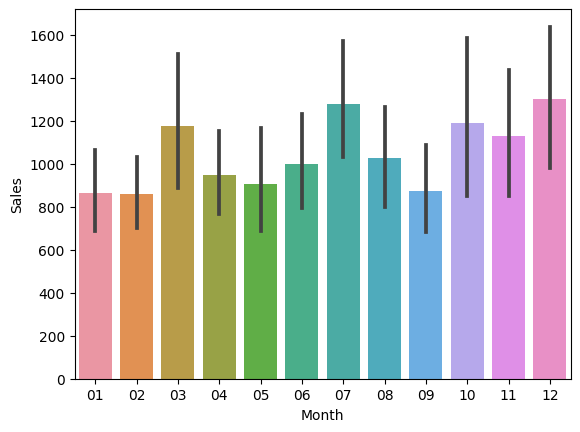

In [38]:
# Barplot showing total sales per month
sns.barplot(data=df,x='Month', y='Sales')

In [39]:
df=df.sort_values(by='Region_Number', ascending=True)

<Axes: xlabel='Region_Number', ylabel='Sales'>

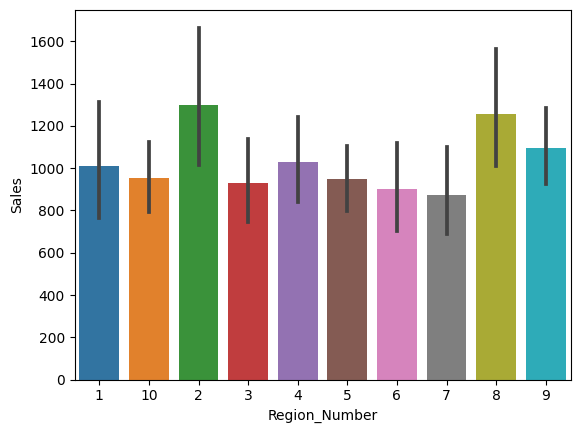

In [40]:
# Barplot showing total sales per region
sns.barplot(data=df, x='Region_Number', y='Sales')

In [41]:
df=df.sort_values(by='Product_Number', ascending=True)

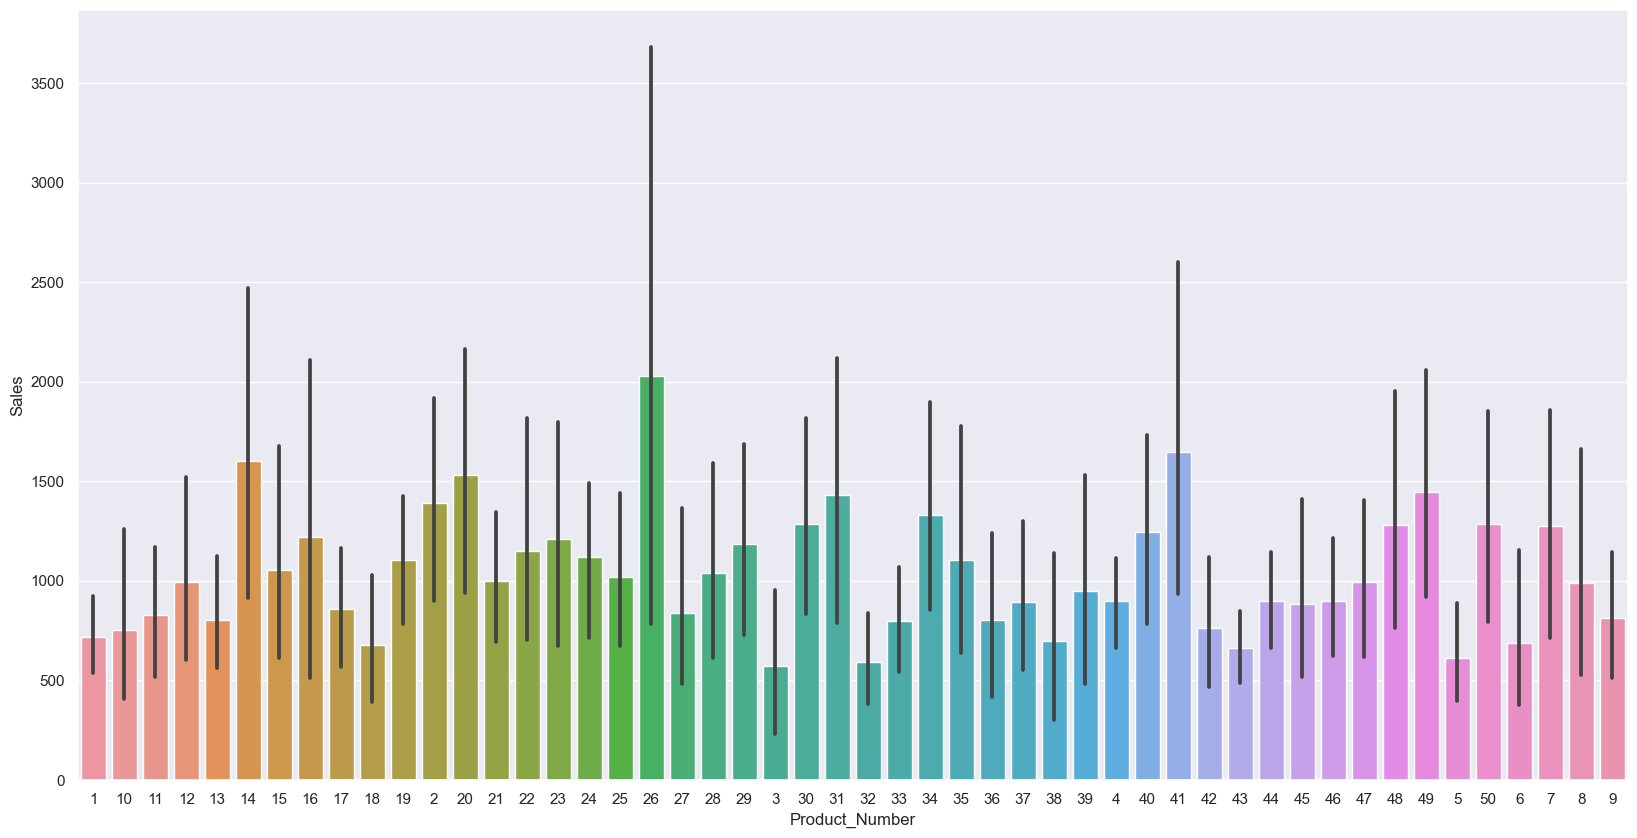

In [43]:
# Barplot showing total sales of each product
sns.barplot(data=df, x='Product_Number', y='Sales')
sns.set(rc={"figure.figsize":(40, 20)})

<Axes: xlabel='Product_Number', ylabel='Region_Number'>

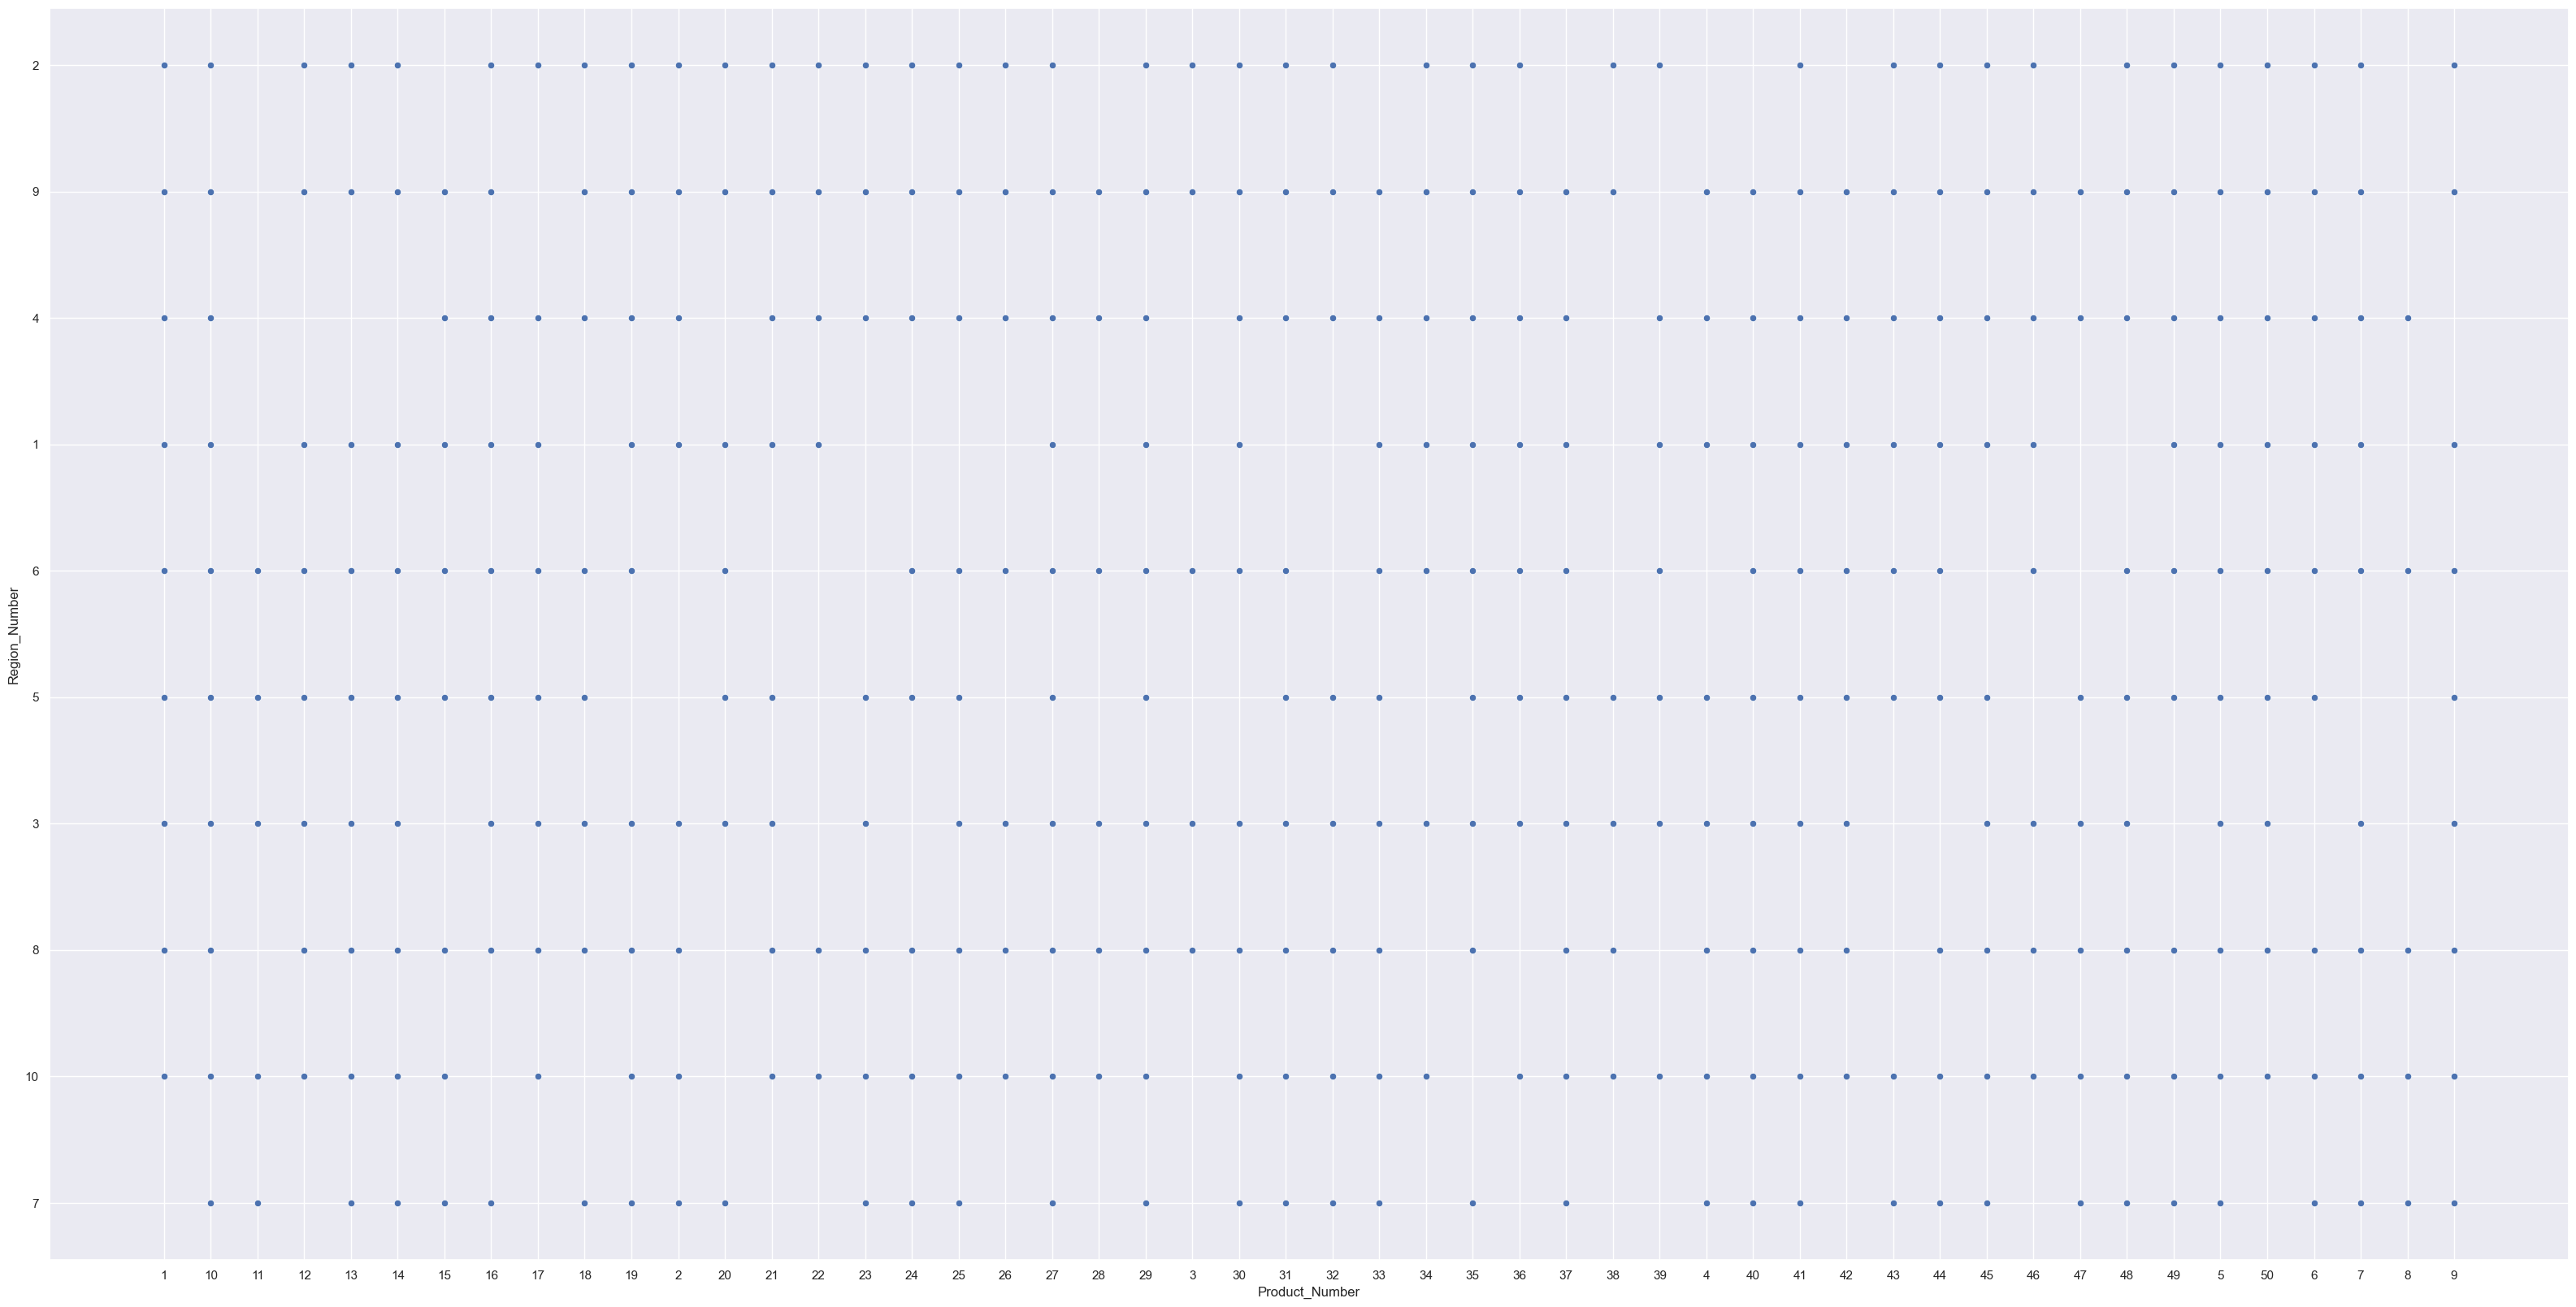

In [44]:
sns.scatterplot(data=df, x="Product_Number", y="Region_Number")


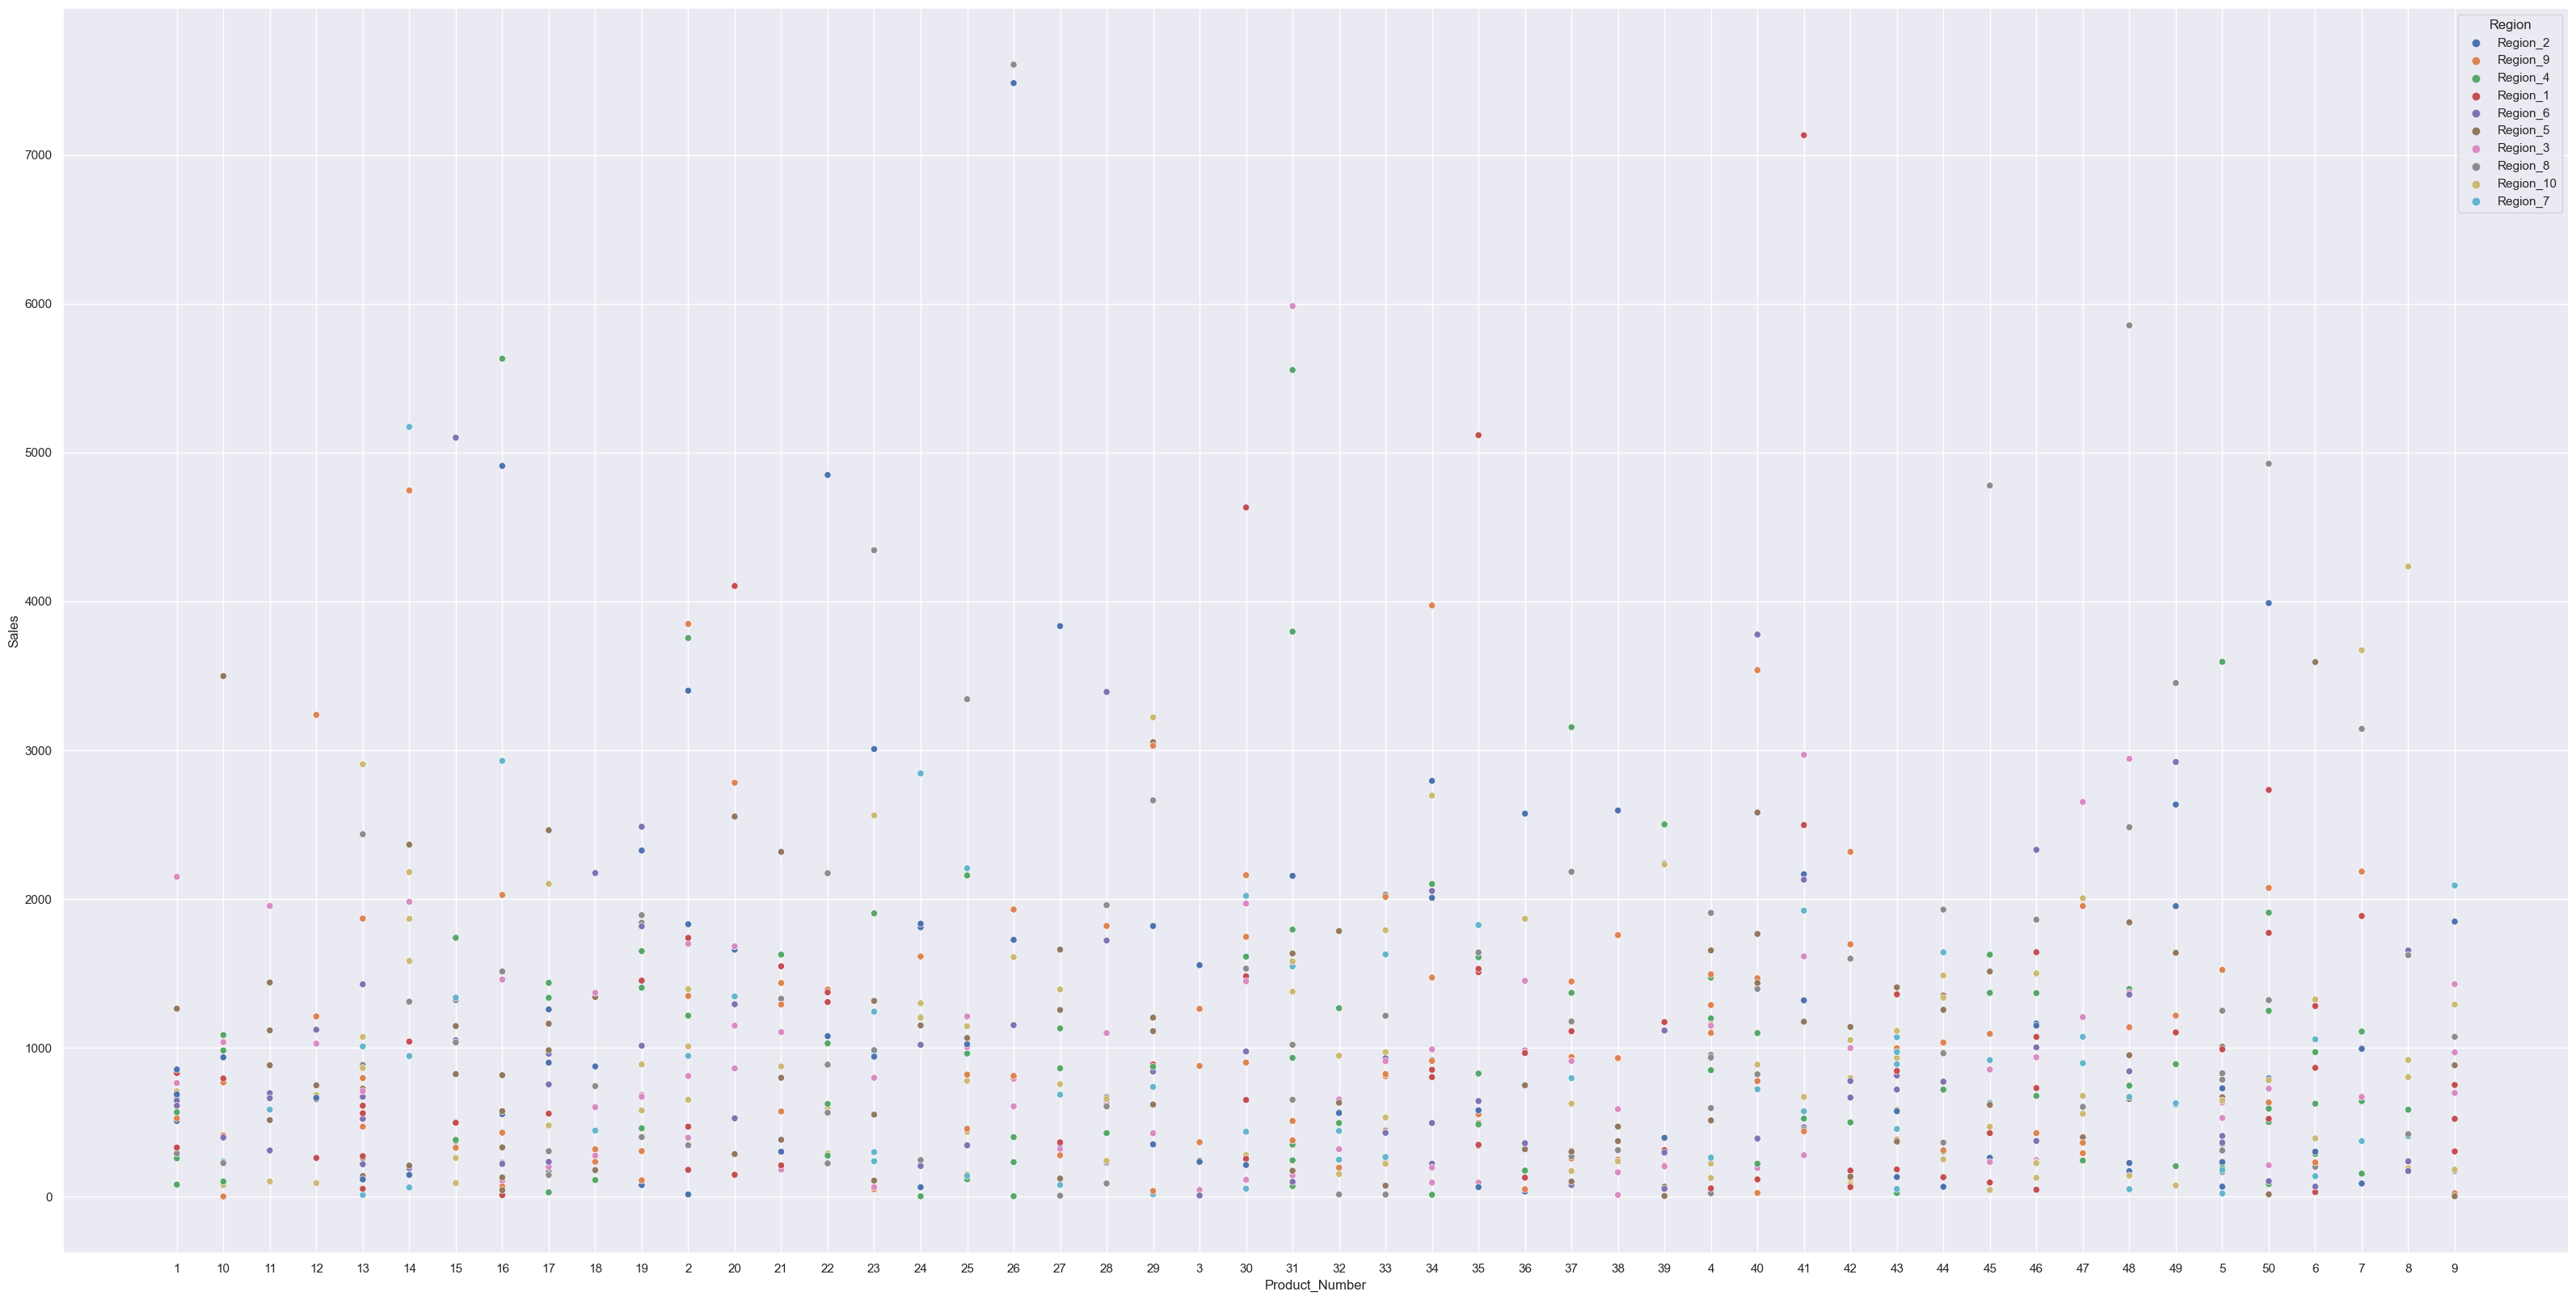

In [45]:
# Scatterplot showing Products sales in each region (filtered by colors)
sns.scatterplot(data=df, x="Product_Number", y="Sales", hue='Region')
sns.set(rc={"figure.figsize":(15, 10)})

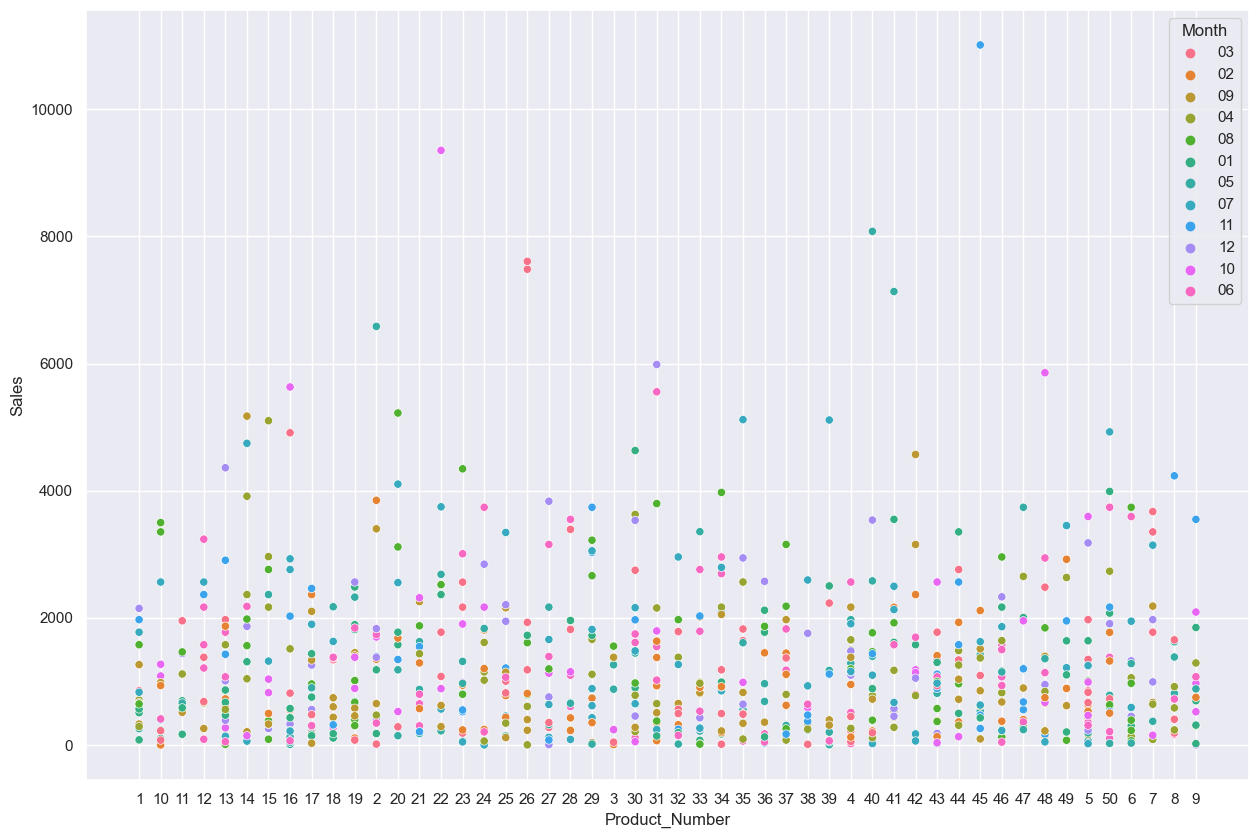

In [301]:
sns.scatterplot(data=df, x="Product_Number", y="Sales", hue='Month')
sns.set(rc={"figure.figsize":(15, 10)})

In [46]:
# Plots of each product showing sales in each region
sns.displot(data=df_group, x="Region", y="Sales", col="Product", col_wrap=4, height=10)

Analysis - 

1) What conclusions can you draw about sales performance of various products and regions?

The barplot between Month and Sales shows that most products have sales higher than $1000, while only some products have sales higher than $1500. Product_26 had the highest sales of approximately $2490, and Product_3 had the lowest sales of roughly $700. 
From the barplot between Region and Sales, we notice that sales in December were the highest, potentially due to seasonal discounts accounted for by Christmas and New Year offers, followed by relatively higher sales in July and November. 

- From the Product_Number, colored by Region, and sales graph, we can conclude that the two products contributing to the highest sales in Region_8 are Product_26 and Product_45.
- From the Product_Number, coloured by Month, and sales scatterplot, we can conclude that the products contributing to the highest sales in November and December are PRoduct_45 and Product_31, respectively.


2) What recommendations do you have for the business?

We need to assess each product's sales in each region to make recommendations. We can see this in the scatterplot above. Here are a few suggestions:
- Product_26 has the highest sales, which leads us to believe it is in demand. However, this product is sold somewhere other than Region_1 and Region_5. The sales in these regions are moderate. To increase sales, I recommend making Product_26 available in both Region_1 and Region_5 as well. 
- Product_11 has moderately low sales because we can see that it is not available in most regions. Make Product_11 available in more areas to increase sales. (The suggestion would be to do market research before making it available in the regions).
- Region_10 had the lowest sales despite having most of the products available in the region. My recommendation would be to engage a marketing team. 
- All Products with low sales are probably more expensive. A recommendation would be to decrease the price.
- For all Regions with low sales, assess the market and demographic. Ensure products more likely to be demanded in these regions are available here.
- We can see a spike in sales in July and December which is also the festive season. During the festive season, we have a lot of discounts. I recommend deals like that in other months/occasions, such as a Valentine's Day sale in February (per the analysis, February had the lowest sales). This could increase the sales of products throughout the year.

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

The data cleaning approach that I took was the following:
- Dropped all duplicates
- Dropped all rows with all fields as NaN 
- Dropped all rows with Product as NaN - this is because without specific details about the product, we cannot come up with an accurate analysis.
- Dropped all rows with Region as NaN - this is because the region offers various important factors needed for our analysis.  
- Created a column Sales (=Price X Units Sold) to determine exact sales that are done for each product. 
- Created a column Month to see when the sales are the highest. 
- Visualised this data in scatterplots and boxplot to see outliers. 
- Dropped all obvious outliers visible in the plots. 
- Replaced all rows with Price as NaN with the mean of the specific product's price. 
- Replaced all rows with Units Sold as NaN with the mean of the specific product's units sold on an average.

Since the dataset provided had a lot of missing values, I took a methodical approach of starting with removing all duplicate values that can compromise the integrity of the data, followed by dropping all missing and null values to be able to extract meaningful insights using data visualization techniques such as creating scatter and bar plots between various attributes to assess the correlation between the same.


